In [13]:
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import layers, losses
from keras.datasets import fashion_mnist
from keras.models import Model

In [14]:
class DenoiseAutoencoder(Model):
    def __init__(self):
        super(DenoiseAutoencoder, self).__init__()
        self.encoder = tf.keras.Sequential([
            layers.Input(shape=(28, 28, 1)),
            layers.Conv2D(16, (3, 3), activation='relu', padding='same', strides=2),
            layers.Conv2D(8, (3, 3), activation='relu', padding='same', strides=2)])

        self.decoder = tf.keras.Sequential([
            layers.Conv2DTranspose(8, kernel_size=3, strides=2, activation='relu', padding='same'),
            layers.Conv2DTranspose(16, kernel_size=3, strides=2, activation='relu', padding='same'),
            layers.Conv2D(1, kernel_size=(3, 3), activation='sigmoid', padding='same')])

    @tf.function
    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

In [15]:
# Load dataset
(x_train, _), (x_test, _) = fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

print(x_train.shape)

(60000, 28, 28, 1)


In [16]:
# Add noise to data
noise_factor = 0.2
x_train_noisy = x_train + noise_factor * tf.random.normal(shape=x_train.shape)
x_test_noisy = x_test + noise_factor * tf.random.normal(shape=x_test.shape)

x_train_noisy = tf.clip_by_value(x_train_noisy, clip_value_min=0., clip_value_max=1.)  # put data between two value
x_test_noisy = tf.clip_by_value(x_test_noisy, clip_value_min=0., clip_value_max=1.)


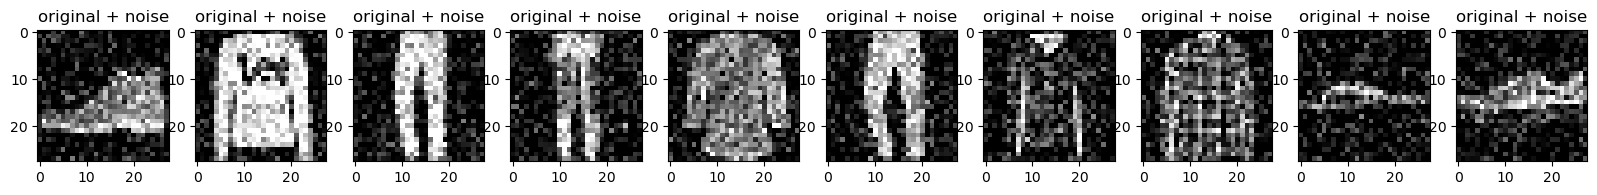

In [17]:
# Illustrate data

n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.title("original + noise")
    plt.imshow(tf.squeeze(x_test_noisy[i]))
    plt.gray()
plt.show()

In [18]:
denoise_autoencoder = DenoiseAutoencoder()
denoise_autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())
denoise_autoencoder.fit(x_train_noisy, x_train,
                        epochs=10,
                        shuffle=True,
                        validation_data=(x_test_noisy, x_test))

denoise_autoencoder.encoder.summary()
denoise_autoencoder.decoder.summary()

Epoch 1/10
1875/1875 [==============================] - 45s 24ms/step - loss: 0.0187 - val_loss: 0.0107
Epoch 2/10
1875/1875 [==============================] - 46s 24ms/step - loss: 0.0100 - val_loss: 0.0096
Epoch 3/10
1875/1875 [==============================] - 46s 25ms/step - loss: 0.0091 - val_loss: 0.0089
Epoch 4/10
1875/1875 [==============================] - 46s 24ms/step - loss: 0.0087 - val_loss: 0.0087
Epoch 5/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0084 - val_loss: 0.0084
Epoch 6/10
1875/1875 [==============================] - 44s 23ms/step - loss: 0.0082 - val_loss: 0.0081
Epoch 7/10
1875/1875 [==============================] - 44s 23ms/step - loss: 0.0080 - val_loss: 0.0080
Epoch 8/10
1875/1875 [==============================] - 44s 23ms/step - loss: 0.0079 - val_loss: 0.0079
Epoch 9/10
1875/1875 [==============================] - 44s 24ms/step - loss: 0.0078 - val_loss: 0.0078
Epoch 10/10
1875/1875 [==============================] - 44s 23m

In [19]:
encoded_imgs = denoise_autoencoder.encoder(x_test_noisy).numpy()
decoded_imgs = denoise_autoencoder.decoder(encoded_imgs).numpy()

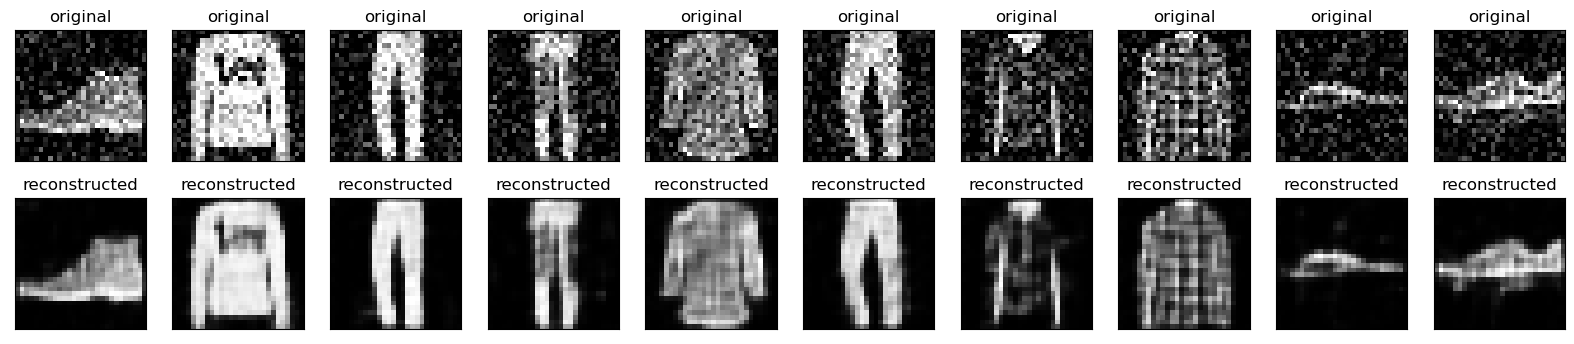

In [20]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i])
    plt.title("original")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i])
    plt.title("reconstructed")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()